In [1]:
# import des librairies dont nous aurons besoin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

# chargement et affichage des données

data = pd.read_csv('operations.csv')

print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
..             ...                                           ...      ...   
304     2023-10-05                       CARTE XX XX XX XX XX XX   -10.64   
305     2023-10-05                             CARTE XX XX XX XX    -4.80   
306     2023-10-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.92   
307     2023-10-06                       CARTE XX XX CHEZ LUC XX   -10.00   
308     2023-10-06                PRELEVEMENT XX TELEPHONE XX XX   -13.58   

     solde_avt_ope                categ  
0          1515.25               

In [2]:
data.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

In [3]:
print(data.isnull().sum())

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64


In [4]:
data['date_operation'] = pd.to_datetime(data['date_operation'])

In [5]:
data_na = data.loc[data['montant'].isnull(),:]

# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']

In [6]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [7]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'

In [8]:
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [9]:
data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

In [10]:
data.describe()

,date_operation,montant,solde_avt_ope
count,308,308.000000,308.000000
mean,2023-07-05 10:59:13.246753280,-45.782013,3395.301071
min,2023-03-31 00:00:00,-15000.000000,1416.810000
25%,2023-05-21 06:00:00,-20.447500,3010.737500
50%,2023-07-05 12:00:00,-9.600000,3452.465000
75%,2023-08-21 00:00:00,-2.715000,3787.232500
max,2023-10-06 00:00:00,1071.600000,4709.310000
std,NaN,872.818105,667.109412


mask = # condition à vérifier pour cibler spécifiquement certaines lignes

data.loc[mask, 'ma_colonne'] = nouvelles_valeurs

VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne'

                  , 'USA']

mask = ~data['pays'].isin(VALID_COUNTRIES)

data.loc[mask, 'pays'] = np.NaN

<Axes: ylabel='proportion'>

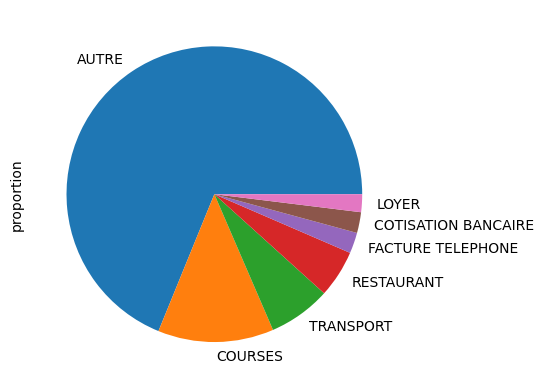

In [11]:
# Diagramme en secteurs

data["categ"].value_counts(normalize=True).plot(kind='pie')



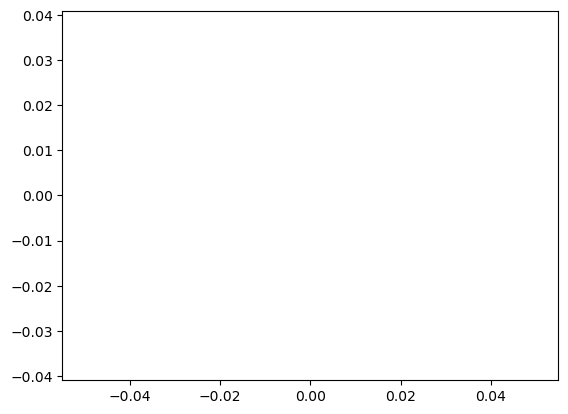

In [12]:
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse

plt.axis('equal') 

plt.show() # Affiche le graphique


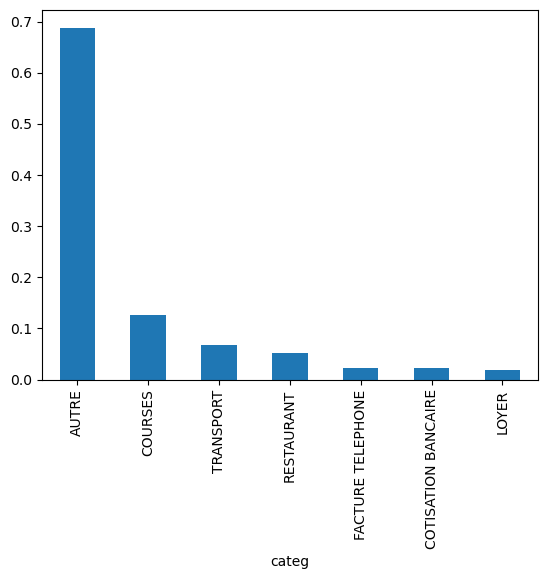

In [13]:


# Diagramme en tuyaux d'orgues

data["categ"].value_counts(normalize=True).plot(kind='bar')

plt.show()

In [14]:
data["date_operation"] = pd.to_datetime(data["date_operation"], format='%Y-%m-%d')

In [15]:
data.isnull().sum()

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64

In [16]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

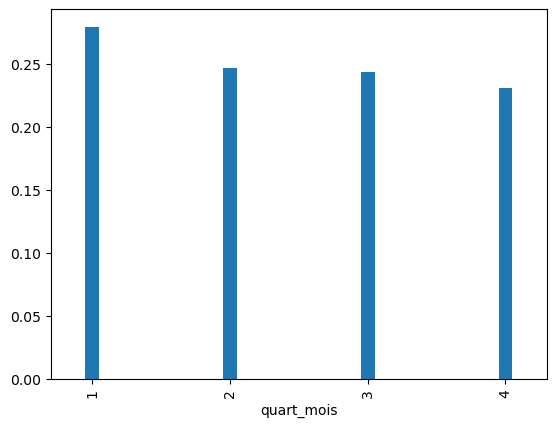

In [17]:
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)

plt.show()

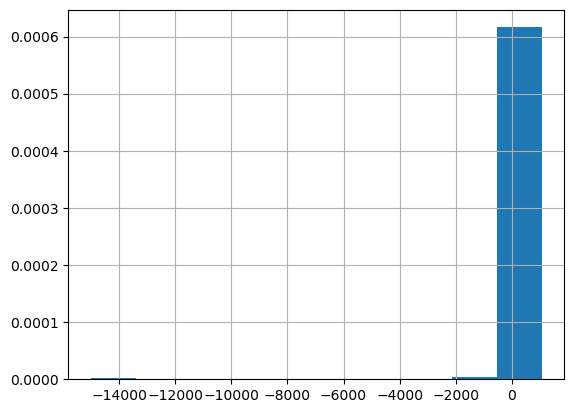

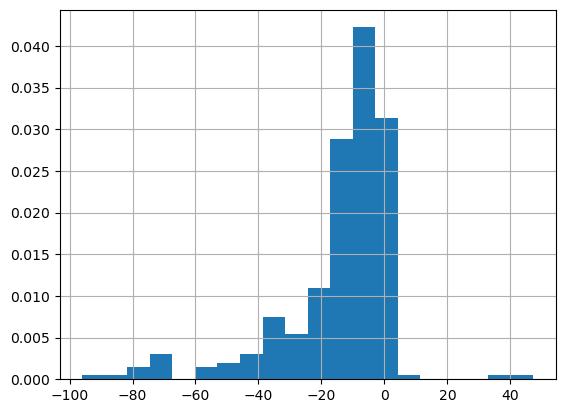

In [18]:
# Histogramme
data["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

In [19]:
effectifs = data["quart_mois"].value_counts()
print(effectifs)
print(type(effectifs))
modalites = effectifs.index # l'index de effectifs contient les modalités
print(modalites)
print(type(modalites))

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités

tab["n"] = effectifs.values

tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

quart_mois
1    86
2    76
3    75
4    71
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index([1, 2, 3, 4], dtype='int64', name='quart_mois')
<class 'pandas.core.indexes.base.Index'>


In [20]:
display(tab)

,quart_mois,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [21]:
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

display(tab)
    

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


In [22]:
data['montant'].mode()

0   -1.6
Name: montant, dtype: float64

In [23]:
data['montant'].mean()

np.float64(-45.78201298701299)

In [24]:
data['montant'].median()

-9.6

In [25]:
data['montant'].max()

1071.6

In [26]:
data['montant'].min()

-15000.0

(-15000.0, 0.0)

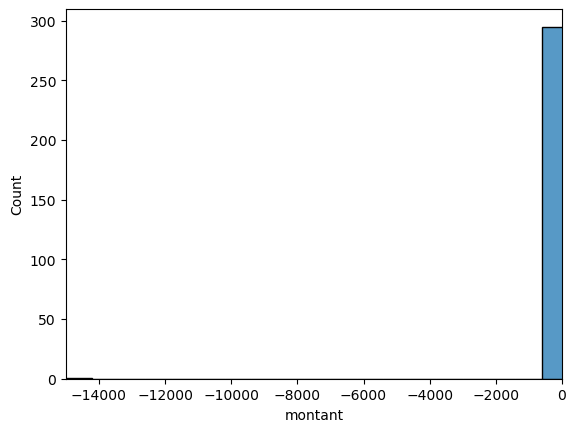

In [27]:
sns.histplot(data=data.loc[data['montant']< 1000],  x='montant', bins=20)
plt.xlim(-15000, 0)

In [28]:
liste_type_operation = data['categ'].unique()
liste_type_operation = liste_type_operation.tolist()

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : AUTRE
Moyenne : -47.25363207547169
Médiane : -8.31
Variance : 1105251.2667976457
Ecart type : 1051.3093107157597
coefficient de variation: -22.24822229615384
Mode : 0   -1.6
Name: montant, dtype: float64
skw:
 -13.736169029614368
kur:
 196.5248677139973


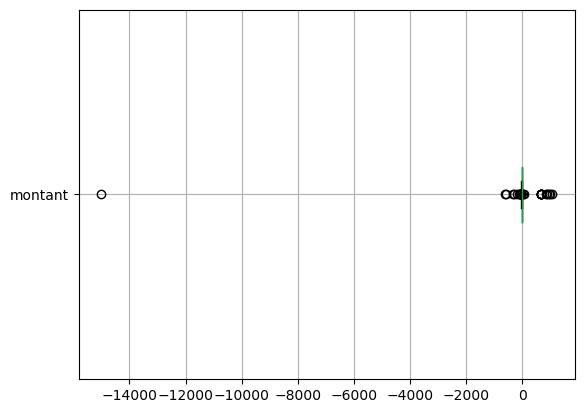

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : TRANSPORT
Moyenne : -52.99714285714286
Médiane : -53.1
Variance : 2315.267711428572
Ecart type : 48.11722884194987
coefficient de variation: -0.9079211868393149
Mode : 0   -73.0
Name: montant, dtype: float64
skw:
 -1.248265076217821
kur:
 2.1922705326917495


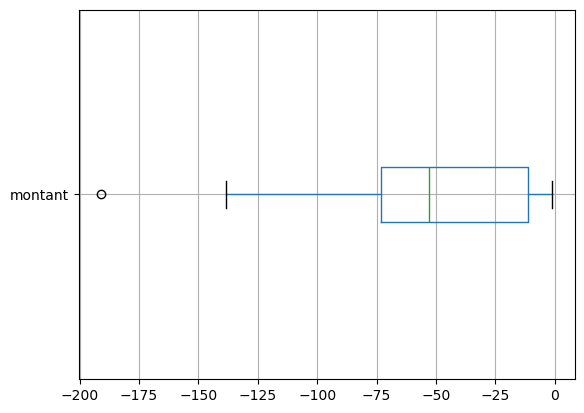

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : FACTURE TELEPHONE
Moyenne : -12.045714285714283
Médiane : -7.02
Variance : 122.52222857142853
Ecart type : 11.068975949537
coefficient de variation: -0.91891403755644
Mode : 0   -7.02
1   -6.38
Name: montant, dtype: float64
skw:
 -2.3876514564281526
kur:
 5.798563367885492


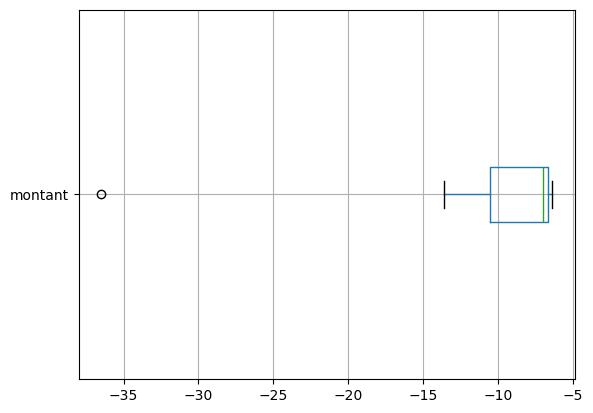

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : COURSES
Moyenne : -16.34128205128205
Médiane : -12.24
Variance : 181.68391673414303
Ecart type : 13.479017647222776
coefficient de variation: -0.8248445626801529
Mode : 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
skw:
 -1.2467488306456982
kur:
 1.6047304940874998


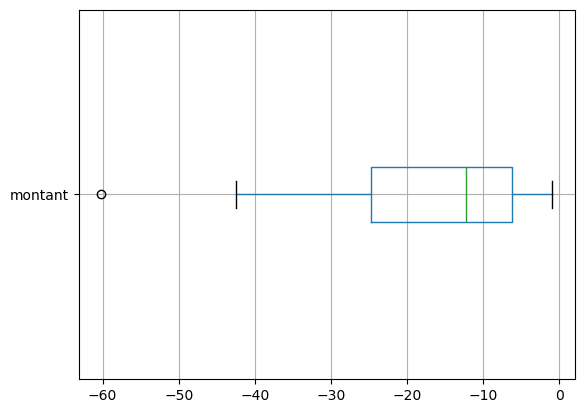

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : COTISATION BANCAIRE
Moyenne : -1.8857142857142857
Médiane : -1.92
Variance : 0.0018285714285714218
Ecart type : 0.04276179870598782
coefficient de variation: -0.02267671143499354
Mode : 0   -1.92
Name: montant, dtype: float64
skw:
 0.37416573867739106
kur:
 -2.800000000000003


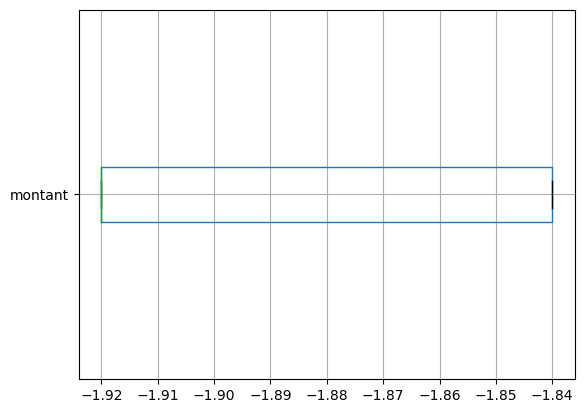

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : RESTAURANT
Moyenne : -10.3325
Médiane : -10.1
Variance : 3.0434066666666677
Ecart type : 1.7445362325462512
coefficient de variation: -0.16883970312569574
Mode : 0   -9.2
Name: montant, dtype: float64
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


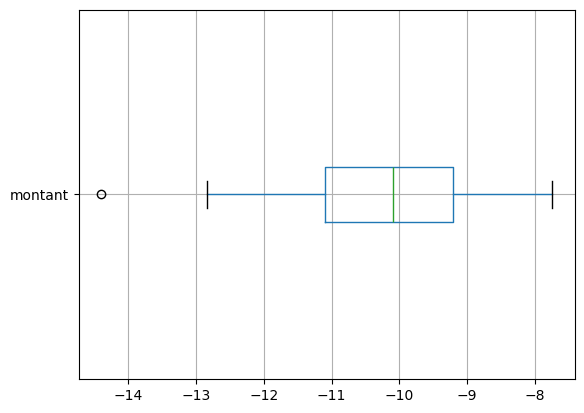

----------------------------------------------------------------------------------------------------
Moyenne, médiane, Variance et mode pour la catégorie : LOYER
Moyenne : -345.0
Médiane : -345.0
Variance : 0.0
Ecart type : 0.0
coefficient de variation: -0.0
Mode : 0   -345.0
Name: montant, dtype: float64
skw:
 0.0
kur:
 0.0


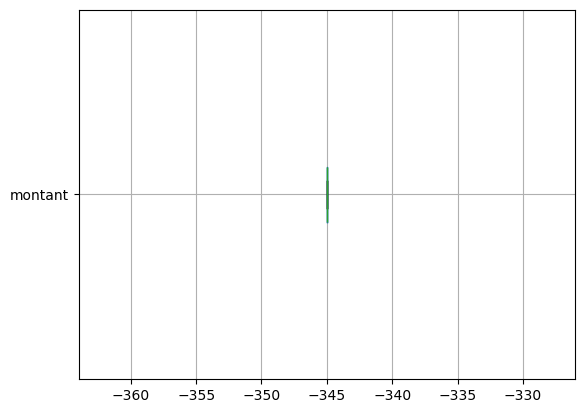

In [44]:
for elt in liste_type_operation:
    df = data.loc[data['categ'] == elt]
    print("-"*100)
    print("Moyenne, médiane, Variance et mode pour la catégorie :", elt)
    print("Moyenne :", df['montant'].mean())
    print("Médiane :", df['montant'].median())
    print("Variance :", df['montant'].var(ddof=1))
    print("Ecart type :", df['montant'].std())
    print("coefficient de variation:", df['montant'].std()/df['montant'].mean())
    print("Mode :", df['montant'].mode())
    print("skw:\n",df['montant'].skew())
    print("kur:\n",df['montant'].kurtosis())
    df.boxplot(column="montant", vert=False)
    plt.show()

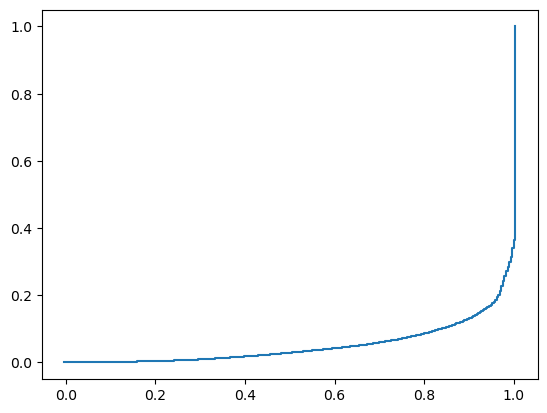

In [52]:
depenses = data[data['montant'] < 0]

dep = -depenses['montant'].values

n = len(dep)

lorenz = np.cumsum(np.sort(dep)) / dep.sum()

lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.show()

In [53]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.

S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz

gini = 2*S

gini

np.float64(0.8937793499214055)

In [74]:
essai = data.loc[data['solde_avt_ope'] < 1500, ['montant', 'solde_avt_ope']]
display(essai)

,montant,solde_avt_ope
2,-73.0,1489.81
3,676.0,1416.81


In [81]:
data['solde_avt_ope'].describe()

count     308.000000
mean     3395.301071
std       667.109412
min      1416.810000
25%      3010.737500
50%      3452.465000
75%      3787.232500
max      4709.310000
Name: solde_avt_ope, dtype: float64

In [98]:
tranches = pd.DataFrame({
    "solde_avt_ope": pd.Series(dtype="float"),
    "montant": pd.Series(dtype="float")
})
tranches

,solde_avt_ope,montant


In [99]:
limb = [0, 1500, 2000, 2500, 3000, 3500, 4000]
limh = [1500, 2000, 2500, 3000, 3500, 4000, 4500]
for i in range(0, 7):
    df = data.loc[(data['solde_avt_ope'] < limh[i]) & (data['solde_avt_ope'] > limb[i]), ['montant', 'solde_avt_ope']]
    df['solde_avt_ope'] = limh[i]
    liste_df = [tranches, df]
    tranches = pd.concat(liste_df)


,solde_avt_ope,montant
2,1500.0,-73.00
3,1500.0,676.00
0,2000.0,-1.44
1,2000.0,-24.00
298,2000.0,-1.20
...,...,...
127,4500.0,-8.00
128,4500.0,-6.60
129,4500.0,-27.68
130,4500.0,-17.20


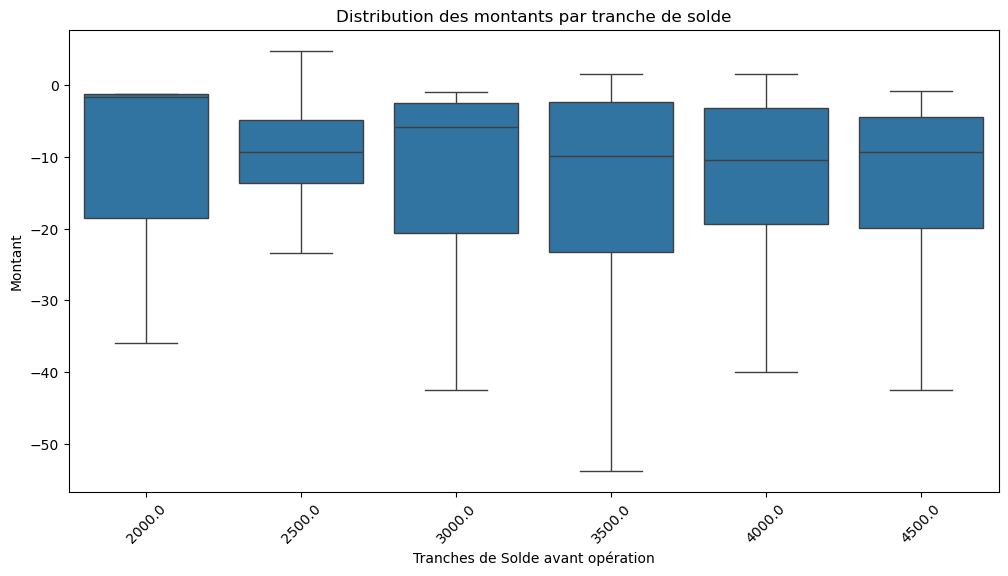

In [103]:
# On définit la taille du graphique
plt.figure(figsize=(12, 6))

# On crée le boxplot
# x : votre colonne de tranches (solde_avt_ope)
# y : la valeur numérique à analyser (montant)
sns.boxplot(data=tranches.loc[tranches['solde_avt_ope'] >= 2000], x='solde_avt_ope', y='montant', showfliers=False)

plt.title('Distribution des montants par tranche de solde')
plt.xlabel('Tranches de Solde avant opération')
plt.ylabel('Montant')
plt.xticks(rotation=45) # Utile si les noms de tranches sont longs
plt.show()